<a href="https://colab.research.google.com/github/v1git12/Capstone-Project-3-Android-Authenticity-Prediction-/blob/main/Android_Authenticity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Android Authenticity Prediction




##### **Project Type**    - Classification/ supervised Machine Learning
##### **Contribution**    - Team
##### **Team Member 1 -** Vinayak Marathe
##### **Team Member 2 -** Riya Patel

# **Project Summary -**

Android Authenticity Prediction is a machine learning problem that aims to predict whether an Android application (app) is authentic or not. In recent years, there has been a significant increase in the number of mobile apps, and as a result, the risk of downloading malicious apps has also increased. Therefore, it is essential to develop a model that can accurately predict the authenticity of Android apps.

The classification of Android authenticity prediction involves the use of supervised learning algorithms such as logistic regression, decision trees, support vector machines, and neural networks. The features used in this classification task include permissions, APIs, and the app's manifest file.

The process of classifying Android apps involves first collecting data about the apps, including their permissions, APIs, and manifest file. The data is then preprocessed to remove any irrelevant or redundant features. The preprocessed data is then used to train a classification model, which is evaluated using metrics such as accuracy, precision, recall, and F1-score.

The results of the classification model can be used to help users make informed decisions about which apps to download and install on their devices. Additionally, this model can help app stores identify and remove malicious apps from their platforms, enhancing the overall security of the mobile ecosystem.






# **GitHub Link -**


1.   Vinayak Marathe: https://github.com/v1git12
2.   Riya Patel: https://github.com/riyapatelrp

# **Problem Statement**


**The problem of Android Authenticity Prediction is to develop a machine learning model that can accurately predict whether an Android application (app) is authentic or not. With the increase in the number of mobile apps, the risk of downloading malicious apps has also increased. Malicious apps can steal sensitive user data, perform unwanted actions, and damage the user's device. Therefore, it is essential to develop a model that can accurately predict the authenticity of Android apps and help users make informed decisions about which apps to download and install on their devices. The challenge is to identify the relevant features that can distinguish between authentic and malicious apps and to train a classification model that can generalize well to new, unseen apps. Additionally, the model should be able to handle the large and dynamic nature of the mobile app ecosystem, where new apps are constantly being developed and released.**





# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [6]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [2]:
# Load Dataset

url = 'https://drive.google.com/file/d/1DQgeRkBy0LDwyf8k-VBBN02kc8_K9oi9/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)


### Dataset First View

In [3]:
# Dataset First Look
df.head()

,App,Package,Category,Description,Rating,Number of ratings,Price,Related apps,Dangerous permissions count,Safe permissions count,...,Your personal information : read calendar events (D),Your personal information : read contact data (D),Your personal information : read sensitive log data (D),Your personal information : read user defined dictionary (D),Your personal information : retrieve system internal state (S),Your personal information : set alarm in alarm clock (S),Your personal information : write Browser's history and bookmarks (D),Your personal information : write contact data (D),Your personal information : write to user defined dictionary (S),Class
0,Canada Post Corporation,com.canadapost.android,Business,Canada Post Mobile App gives you access to som...,3.1,77,0.00,"{com.adaffix.pub.ca.android, com.kevinquan.gas...",7.0,1,...,0,1,0,0,0,0,0,1,0,0
1,Word Farm,com.realcasualgames.words,Brain & Puzzle,Speed and strategy combine in this exciting wo...,4.3,199,0.00,"{air.com.zubawing.FastWordLite, com.joybits.do...",3.0,2,...,0,0,0,0,0,0,0,0,0,0
2,Fortunes of War FREE,fortunesofwar.free,Cards & Casino,"Fortunes of War is a fast-paced, easy to learn...",4.1,243,0.00,"{com.kevinquan.condado, hu.monsta.pazaak, net....",1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,Better Keyboard: Avatar Purple,com.cc.betterkeyboard.skins.avatarpurple,Libraries & Demo,Skin for Better Keyboard featuring a glossy fe...,3.6,2589,0.00,{eu.gdumoulin.betterandroid.skins.transparent....,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Boxing Day,indiaNIC.android.BoxingDay,Lifestyle,Boxing Day by Christopher Jaymes<p>Based on a ...,0.0,0,5.99,NaN,1.0,0,...,0,0,0,0,0,0,0,0,0,1


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(29999, 184)

### Dataset Information

In [5]:
# Dataset Info
df.iloc[:, :10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   App                          29998 non-null  object 
 1   Package                      29999 non-null  object 
 2   Category                     29999 non-null  object 
 3   Description                  29996 non-null  object 
 4   Rating                       29999 non-null  float64
 5   Number of ratings            29999 non-null  int64  
 6   Price                        29999 non-null  float64
 7   Related apps                 29244 non-null  object 
 8   Dangerous permissions count  29795 non-null  float64
 9   Safe permissions count       29999 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 2.3+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

2689

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

App                                                                      1
Package                                                                  0
Category                                                                 0
Description                                                              3
Rating                                                                   0
                                                                        ..
Your personal information : set alarm in alarm clock (S)                 0
Your personal information : write Browser's history and bookmarks (D)    0
Your personal information : write contact data (D)                       0
Your personal information : write to user defined dictionary (S)         0
Class                                                                    0
Length: 184, dtype: int64

<AxesSubplot:>

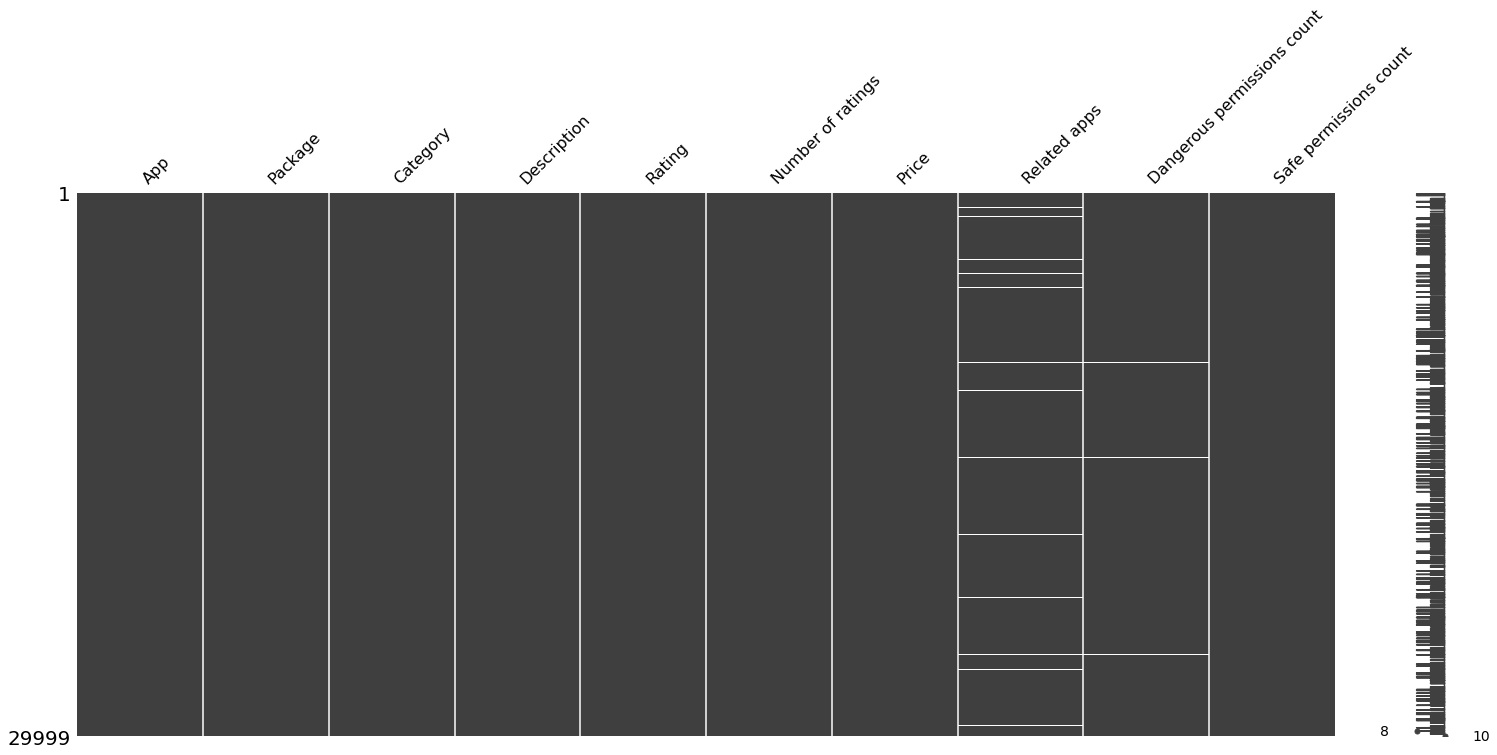

In [10]:
# Visualizing the missing values
import missingno as msno
# visualize the null values in the first 10 columns of the DataFrame
msno.matrix(df.iloc[:, :10])


### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.iloc[:, :10].columns

Index(['App', 'Package', 'Category', 'Description', 'Rating',
       'Number of ratings', 'Price', 'Related apps',
       'Dangerous permissions count', 'Safe permissions count'],
      dtype='object')

In [14]:
# Dataset Describe
df.iloc[:, :10].describe()

,Rating,Number of ratings,Price,Dangerous permissions count,Safe permissions count
count,29999.000000,2.999900e+04,29999.000000,29795.000000,29999.000000
mean,3.537215,6.852608e+03,0.625707,3.111160,1.353978
std,1.424685,4.586899e+04,3.222620,3.052602,1.523491
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,3.300000,4.000000e+00,0.000000,1.000000,0.000000
50%,4.000000,4.600000e+01,0.000000,2.000000,1.000000
75%,4.400000,7.160000e+02,0.000000,4.000000,2.000000
max,5.000000,1.908590e+06,158.070000,30.000000,16.000000


### Variables Description 

1. App:- Name of the App

2. Package:-OBB/Data package installed in root folder 3. Category:- App Category (eg. Entertainment, Adventure, puzzle, Action, Antivirus, etc.)

4. Description:- App Description

5. Rating:- Rating out of 5

6. Number of ratings:- No. of Ratings given by users

7. Price:- Price of the App

8. Related apps:- Apps related to installed App

9. Dangerous (D) permissions count:- No. of Dangerous Permissions allowed by user

10. Safe (S) permissions count-No. of Safe Permissions allowed by user 

11. Default: Access DRM content. (S):-0: No. 1: Yes

12. Default: Access Email provider data (S)- O: No, 1: Yes

13. Default: Access all system downloads (S):-0: No. 1: Yes 14. Default: Access download manager. (S):-O: No. 1: Yes

15. Default: Advanced download manager functions. (S)-0: No. 1: Yes 

16. Default: Audio File Access (S)-0 No. 1: Yes

17. Default: Install DRM content. (S)-0: No. 1: Yes

18. Default: Modify Google service configuration (S)- O: No, 1: Yes 

19. Default: Modify Google settings (S)-0: No, 1: Yes

20. Default: Move application resources (S)-0: No. 1: Yes

21. Default: Read Google settings (S)-0: No, 1: Yes

22. Default: Send download notifications. (S)-0: No, 1: Yes

23. Default: Voice Search Shortcuts (S)-0: No, 1: Yes

24. Default access SurfaceFinger (S)-0: No.1: Yes

25. Default: access checkin properties (S): 0:No, 1: 

26. Default: access the cache filesystem (S)-0: No. 1: Yes

27. Default: access to passwords for Google accounts (S):-0: No, 1: Yes

28. Default: act as an account authenticator (S):-0: No, 1: Yes

29. Default: bind to a wallpaper (S)-0: No. 1: Yes

30. Default: bind to an input method (S):-0: No.1: Yes

31. Default: change screen orientation (S)-0: No., 1: Yes

32. Default: coarse (network-based) location (S)-0: No, 1: Yes

33. Default: control location update notifications (S)-0: No, 1: Yes

34. Default: control system backup and restore (S)-0: No. 1: Yes 35. Default: delete applications (S):-0: No, 1: Yes

36. Default: delete other applications' caches (S)-0: No, 1: Yes 37. Default: delete other applications' data (S):-0: No, 1: Yes

38. Default: directly call any phone numbers (S):-0: No. 1: Yes

39. Default: directly install applications (S)-0: No. 1: Yes

40. Default: disable or modify status bar (S)-O: No. 1: Yes

41. Default: discover known accounts (S)-O: No. 1: Yes 42. Default: display unauthorized windows (S): -0: No. 1: Yes

43. Default: enable or disable application components (S)-0: No, 1: Yes

44. Default: force application to close (S)-0:No. 1: Yes

45. Default force device reboot (S)-0: No. 1: Yes

46. Default: full Internet access (S)-0: No. 1: Yes

47. Default: interact with a device admin (S)-0: No. 1: Yes

48. Default: manage application tokens (S)-0: No. 1: Yes

49. Default: mock location sources for testing (S)-0: No. 1: Yes

50. Default: modify battery statistics (S)-0: No. 1: Yes

51. Default: modify secure system settings (S)-0: No. 1: Yes

52. Default: modify the Google services map (S)-0: No, 1:Yes

53. Default: modify/delete USB storage contents modify/delete SD card contents (S)-0:

54. Default: monitor and control all application launching (S)-0: No. 1: Yes

55. Default: partial shutdown (S)-O: No. 1: Yes

56. Default: permanently disable device (S)-0: No.1: Yes

57. Default: permission to install a location provider (S)-0: No. 1: Yes

58. Default: power device on or off (S)-0: No, 1: Yes

59. Default: press keys and control buttons (S):-0: No, 1: Yes

60. Default: prevent app switches (S)-0: No. 1: Yes

61. Default: read frame buffer (S)-0: No.1: Yes

62. Default: read instant messages (S)-0: No. 1: Yes

63. Default read phone state and identity (S)-0: No. 1: Yes

64. Default: record what you type and actions you take (S): O: No. 1: Yes

65. Default: reset system to factory defaults ($):-O: No. 1: Yes

66. Default: run in factory test mode (S)-0: No. 1: Yes

67. Default: set time ($):-0: No. 1: Yes

68. Default: set wallpaper size hints (S)-0: No. 1: Yes

69. Default: start IM service (S)-0: No. 1: Yes

70. Default: update component usage statistics (S)-0: No. 1: Yes

71. Default: write contact data (S)-0: No. 1: Yes

72. Default: write instant messages (S)-0 No. 1: Yes

73. Development tools: enable application debugging (D):-0: No. 1: Yes

74. Development tools: limit number of running processes (D) O:No. 1: Yes

75. Development tools: make all background applications close (D):- O: No. 1: Yes 

76. Development tools: send Linux signals to applications (D)- O: No, 1: Yes

77. Hardware controls: change your audio settings (D):-0: No.1: Yes 78. Hardware controls: control flashlight (S)-O:No.1: Yes

79. Hardware controls: control vibrator (S)-O: No.1: Yes

80. Hardware controls: record audio (0)-0: No. 1: Yes

81. Hardware controls: take pictures and videos (D):-O: No. 1: Yes

82. Hardware controls: test hardware (S)-O: No, 1: Yes

83. Network communication: Broadcast data messages to applications. (S):- O: No. 1: Yes

84. Network communication: control Near Field Communication (D):-0: No. 1: Yes

85. Network communication: create Bluetooth connections (D):-0: No. 1: Yes 

86. Network communication: download files without notification (S)-0: No, 1: Yes

87. Network communication: full Internet access (D):-0: No, 1: Yes 

88. Network communication: make/receive Internet calls (D)-0: No, 1: Yes

89. Network communication: receive data from Internet (S)-0: No. 1: Yes

90. Network communication: view Wi-Fi state (S)-0: No. 1: Yes

91. Network communication: view network state (S):-0: No. 1: Yes

92. Phone calls: intercept outgoing calls (D):-0: No. 1: Yes

93. Phone calls: modity phone state (S)-O: No. 1: Yes

94. Phone calls: read phone state and identity (D)-O: No, 1: Yes

95. Services that cost you money: directly call phone numbers (D):- 0 No. 1: Yes

96. Services that cost you money: send SMS messages (D):-0: No. 1: Yes

97. Storage: modify/delete USB storage contents modify/delete SD card contents (D)-0: No. 1: Yes

98. System tools: allow Wi-Fi Multicast reception (D):-0: No. 1: Yes 

99. System tools: automatically start at boot (S)-0: No, 1: Yes

100. System tools: bluetooth administration (D):- O: No. 1: Yes

101. System tools: change Wi-Fi state (D)-O: No, 1: Yes

102. Systern tools: change background data usage setting (S)-0: No, 1: Yes

103. Systern tools: change network connectivity (D)-0 No. 1: Yes

104. System tools: change your Ul settings (D)-0: No, 1: Yes

105. System tools: delete all application cache data (D)-0: No. 1: Yes

106. System tools: disable keylock (D)-0: No. 1: Yes

107. Systern tools: display system-level alerts (D): 0:No. 1: Yes 

108. Systern tools: expand/collapse status bar (5)-0: No. 1: Yes

109. System tools: force stop other applications (S)-0: No. 1: Yes

110. System tools: format external storage (D):-0: No, 1: Yes

111. System tools: kill background processes (S)-0: No. 1: Yes

112. System tools: make application always run (D)-0: No. 1: Yes

113. System tools: measure application storage space (S)-0: No. 1: Yes

114. System tools: modify global animation speed (D):-0: No. 1: Yes

115. System tools: modify global system settings (D):-0: No. 1: Yes

116. System tools: mount and unmount filesystems (D):-0: No. 1: Yes

117. System tools: prevent device from sleeping (D):-0: No. 1: Yes

118. System tools: read subscribed feeds (S)-O: No, 1: Yes

119. System tools: read sync settings (S)-0: No, 1: Yes

120. System tools: read sync statistics (S)-0: No. 1: Yes

121. System tools: read/write to resources owned by diag (S)-0: No. 1: Yes

122. System tools reorder running applications (D)-0: No. 1: Yes 

123. System tools: retrieve running applications (D)-0: No, 1: Yes

124. System tools: send package removed broadcast (S)-0: No. 1: Yes 
125. Systern tools: send sticky broadcast (S)-0: No, 1: Yes

126. System tools: set preferred applications (S)-0: No, 1: Yes 

127. System tools: set time zone (D)-0: No. 1: Yes

128. System tools: set wallpaper (S):- O: No. 1: Yes

129. Systern tools: set wallpaper size hints (S):-O: No. 1: Yes 

130. System tools: write Access Point Name settings (D):- O: No. 1: Yes

131. System tools: write subscribed feeds (D):- O: No. 1: Yes

132. System tools: write sync settings (D):- O: No. 1: Yes

133. Your accounts: Blogger (D):-0: No.1: Yes

134. Your accounts: Google App Engine (D):-0: No, 1: Yes

135. Your accounts: Google Docs (D)-0: No, 1: Yes

136. Your accounts: Google Finance (D):-0: No. 1: Yes 

137. Your accounts: Google Maps (D)-0: No. 1: Yes

138. Your accounts: Google Spreadsheets (D):-0: No, 1: Yes

139. Your accounts: Google Voice (D):-0: No, 1: Yes

140. Your accounts: Google mail (D)-0: No. 1: Yes

141. Your accounts: Picasa Web Albums (D):-0: No, 1: Yes

142. Your accounts: YouTube (D)-0: No.1: Yes

143. Your accounts: YouTube usernames (D)-0. No.1: Yes

144. Your accounts: access all Google services (S): O: No, 1: Yes

145. Your accounts: access other Google services (D):-O No. 1: Yes

146. Your accounts: act as an account authenticator (D):- O: No, 1: Yes

147. Your accounts: act as the AccountManagerService (S)- O: No, 1: Yes

148. Your accounts: contacts data in Google accounts (D):- O: No.1: Yes 

149. Your accounts: discover known accounts (S)-0: No. 1: Yes

150. Your accounts: manage the accounts list (D)-0: No. 1: Yes 

151. Your accounts: read Google service configuration (S)-0: No. 1: Yes

152. Your accounts use the authentication credentials of an account (D)-0: No. 1: Yes

153. Your accounts: view configured accounts (S)-0: No.1: Yes

154. Your location: access extra location provider commands (S)-O: No., 1: Yes

155. Your location: coarse (network-based) location (D)-0: No. 1: Yes 

156. Your location: fine (GPS) location (D):-0: No, 1: Yes

157. Your location: mock location sources for testing (D):-O No.1: Yes

158. Your messages: Read Email attachments (D):-0: No, 1: Yes

159. Your messages: Send Gmail (S)-0: No.1: Yes

160. Your messages: edit SMS or MMS (D):-0: No.1: Yes

161. Your messages: modify Gmail (D):-0: No. 1: Yes

162. Your messages: read Gmail (D)-0: No. 1: Yes

163. Your messages: read Gmail attachment previews (D):-O: No. 1: Yes

164. Your messages: read SMS or MMS (D)-0: No. 1: Yes

165. Your messages: read instant messages (D)-0: No. 1: Yes

166. Your messages: receive MMS (D)-0: No. 1: Yes

167. Your messages: receive SMS (D):-0: No. 1: Yes

168. Your messages: receive WAP (D):-0: No, 1: Yes

169. Your messages: send SMS-received broadcast (S)-O:No. 1: Yes

170. Your messages: send WAP-PUSH-received broadcast (S)-0: No. 1: Yes

171. Your messages: write instant messages (D):- O: No. 1: Yes

172. Your personal information: add or modify calendar events and send email to guests (D):-0: No. 1: Yes

173. Your personal information: choose widgets (S)-0: No. 1: Yes

174. Your personal information: read Browser's history and bookmarks (D)-0: No. 1: Yes 

175. Your personal information: read calendar events (D)-0: No. 1: Yes

176. Your personal information: read contact data (D):-0: No. 1: Yes 177. Your personal information: read sensitive log data (D)-0: No. 1: Yes

178. Your personal information: read user defined dictionary (D)-0: No. 1: Yes

179. Your personal information : retrieve system internal state (S)-0: No, 1: Yes

180. Your personal information: set alarm in alarm clock (5)-0: No.1: Yes

181. Your personal information: write Browser's history and bookmarks (D):-O: No, 1: Yes

182. Your personal information: write contact data (D)-0: No, 1: Yes

183. Your personal information: write to user defined dictionary (S)-0: No, 1: Yes

184. Class-0: Benign, 1: Malware

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
df.iloc[:, :10].nunique()

App                            22823
Package                        23485
Category                          30
Description                    23552
Rating                            42
Number of ratings               5312
Price                            425
Related apps                   23868
Dangerous permissions count       28
Safe permissions count            16
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
df['Category'].value_counts()

Entertainment        2827
Travel & Local       2154
Books & Reference    1959
Arcade & Action      1959
Brain & Puzzle       1873
Casual               1678
Personalization      1527
Lifestyle            1435
Tools                1329
Education            1305
Communication        1103
Finance              1045
Health & Fitness     1038
Business              945
Cards & Casino        881
Media & Video         782
Productivity          695
Sports                632
Libraries & Demo      611
Comics                585
Music & Audio         553
News & Magazines      480
Transportation        434
Shopping              401
Social                399
Sports Games          341
Photography           297
Racing                288
Medical               270
Weather               173
Name: Category, dtype: int64

In [17]:
df['Rating'].value_counts()

0.0    3303
5.0    2085
4.0    2026
4.2    2004
4.3    1929
4.4    1871
4.5    1860
4.1    1687
4.6    1357
3.9    1328
3.8    1261
3.7    1101
3.6     888
4.7     816
3.0     805
3.5     781
3.4     645
4.8     527
3.3     520
3.2     490
3.1     352
1.0     320
2.8     291
2.9     232
2.7     218
2.5     190
4.9     184
2.6     171
2.0     162
2.3     161
2.4     123
2.2      78
2.1      54
1.8      50
1.9      32
1.5      24
1.7      23
1.6      17
1.3      13
1.4      12
1.2       6
1.1       2
Name: Rating, dtype: int64

In [18]:
df['Dangerous permissions count'].value_counts()

1.0     6569
2.0     5015
3.0     4573
0.0     3822
4.0     3234
5.0     2164
6.0     1384
7.0      815
9.0      538
8.0      517
10.0     329
11.0     173
12.0     121
19.0     110
13.0     109
15.0      88
14.0      59
18.0      39
17.0      35
16.0      32
20.0      22
23.0      20
22.0      12
21.0       8
28.0       2
30.0       2
26.0       2
29.0       1
Name: Dangerous permissions count, dtype: int64

In [19]:
df['Safe permissions count'].value_counts()

0     9894
1     9826
2     5201
3     2650
4     1227
5      513
6      326
7      150
8       85
9       56
10      35
11      18
12      13
14       2
16       2
13       1
Name: Safe permissions count, dtype: int64

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***